 This Python 3 environment comes with many helpful analytics libraries installed

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing



import time, warnings
import datetime as dt

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

warnings.filterwarnings("ignore")

Importing our Excel file into a DataFrame and giving it a name as 'data'

In [68]:
data=pd.read_excel(r"E-com_Data.xlsx")
data.head()

<bound method NDFrame.head of         CustomerID Item Code  InvoieNo Date of purchase  Quantity      Time  \
0           4355.0     15734    398177       2017-10-29         6  15:36:00   
1           4352.0     14616    394422       2017-10-05         2  14:53:00   
2           4352.0     14614    394422       2017-10-12         2  14:53:00   
3           4352.0    85014B    388633       2017-08-22         3  14:47:00   
4           4352.0     15364    394422       2017-10-10         2  14:53:00   
...            ...       ...       ...              ...       ...       ...   
537974         NaN    85194L    372313       2017-03-23         6  09:27:00   
537975         NaN     14693    367605       2017-02-06         2  14:25:00   
537976         NaN     14693    368246       2017-02-06         3  10:40:00   
537977         NaN    85194L    366891       2017-01-29        15  17:05:00   
537978         NaN     14693    391243       2017-09-17        20  12:42:00   

        price per Uni

Check out the rows with missing values


In [70]:
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [3]:
data[data.isnull().any(axis=1)].head()


,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


As we saw above there where many NA values as we well as Null values so now we are Replacing the null with NA Values

In [4]:
data1=data.replace(" ",np.nan)
for i in data1:
    print({i:data1[i].unique()})

{'CustomerID': array([4355., 4352., 4349., ...,    7.,    5., 3244.])}
{'Item Code': array([15734, 14616, 14614, ..., '85194L', 14693, 77618], dtype=object)}
{'InvoieNo': array([398177, 394422, 388633, ..., 372868, 380693, 379378], dtype=int64)}
{'Date of purchase': array(['2017-10-29T00:00:00.000000000', '2017-10-05T00:00:00.000000000',
       '2017-10-12T00:00:00.000000000', '2017-08-22T00:00:00.000000000',
       '2017-10-10T00:00:00.000000000', '2017-10-27T00:00:00.000000000',
       '2017-02-13T00:00:00.000000000', '2017-05-14T00:00:00.000000000',
       '2017-05-12T00:00:00.000000000', '2017-09-07T00:00:00.000000000',
       '2017-09-04T00:00:00.000000000', '2016-12-11T00:00:00.000000000',
       '2017-04-24T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-03-23T00:00:00.000000000', '2017-07-25T00:00:00.000000000',
       '2017-07-31T00:00:00.000000000', '2017-09-20T00:00:00.000000000',
       '2017-03-25T00:00:00.000000000', '2017-09-16T00:00:00.000000000',
   

{'Price': array([ 1926.,  1740.,  1866., ..., 16601.,  5862.,  -976.])}
{'Shipping Location': array(['Location 1', 'Location 10', 'Location 11', 'Location 14',
       'Location 15', 'Location 20', 'Location 21', 'Location 23',
       'Location 24', 'Location 25', 'Location 26', 'Location 28',
       'Location 31', 'Location 32', 'Location 34', 'Location 36',
       'Location 37', 'Location 4', 'Location 7', 'Location 8'],
      dtype=object)}
{'Cancelled_status': array([nan,  1.])}
{'Reason of return': array([nan, 'display', 'Missing'], dtype=object)}
{'Sold as set': array([nan])}


133790 out of 537979 is missing in the Customer ID columns

In [5]:
data.shape

(537979, 12)

Dropping rows with NA present in Customer ID column

In [6]:
data=data.dropna(subset=['CustomerID'])

After Dropping NAs we have reduced to rows  from 537979 to 404189

In [7]:
data.shape

(404189, 12)

Here we have 20 unique Locations

In [8]:
data['Shipping Location'].unique()

array(['Location 1', 'Location 10', 'Location 11', 'Location 14',
       'Location 15', 'Location 20', 'Location 21', 'Location 23',
       'Location 24', 'Location 25', 'Location 26', 'Location 28',
       'Location 31', 'Location 32', 'Location 34', 'Location 36',
       'Location 37', 'Location 4', 'Location 7', 'Location 8'],
      dtype=object)

Checking the Highest no of sales quantity wise in each locations

In [9]:
data1=data['Shipping Location'].value_counts()
data1=pd.DataFrame(data1)
data1
#data1.columns=["data","shipping location"]

,Shipping Location
Location 36,376353
Location 14,8316
Location 26,6981
Location 15,4265
Location 1,2925
Location 11,2257
Location 37,744
Location 25,586
Location 21,517
Location 20,403


% of allocation or the sales found from each Location

In [10]:
data1['Shipping Location %']=(data1['Shipping Location']/sum(data1['Shipping Location']))*100
data1=data1.drop(['Shipping Location'],axis=1)
data1

,Shipping Location %
Location 36,93.113123
Location 14,2.057453
Location 26,1.727162
Location 15,1.055199
Location 1,0.723671
Location 11,0.558402
Location 37,0.184072
Location 25,0.144982
Location 21,0.127910
Location 20,0.099706


Plotting Bar Graph against the same

<AxesSubplot:title={'center':'Hour'}, xlabel='Location', ylabel='Shipping Location %'>

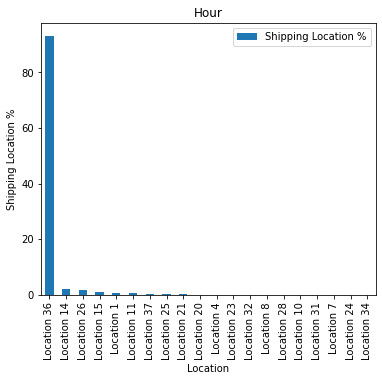

In [11]:
dfg1=data1.sort_values(by='Shipping Location %', ascending=False)
dfg1
dfg1.plot(kind='bar', title='Hour', ylabel='Shipping Location %',xlabel='Location', figsize=(6, 5))

As we could see the highest location with 93% was from location 36 

After all the preprocessing done according to the sale and returned Quantities .We have seperated into two seperate dataframes

df_pos has all the Quantity above 1 i.e. All positive sales 

In [12]:
df_pos = data[data.Quantity > 0]

In [69]:
df_pos.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,hour
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,Noon
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,Noon
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,Noon
5,4349.0,14618,397122,2017-10-27,1,12:43:00,256.0,256.0,Location 1,Noon
7,4341.0,85014B,377109,2017-05-14,3,09:22:00,677.0,2031.0,Location 1,Morning


df_neg has all the Quantity above 1 i.e. All returned sales 

In [13]:
df_neg = data[data.Quantity < 0]

Dropping Unwanted Columns

In [14]:
df_pos=df_pos.drop(['Reason of return','Cancelled_status'],axis=1)
df_pos
df_pos=df_pos.drop(['Sold as set'],axis=1)
df_pos
df_neg=df_neg.drop(['Reason of return','Cancelled_status'],axis=1)
df_neg
df_neg=df_neg.drop(['Sold as set'],axis=1)
df_neg

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
6,4343.0,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1
31,4325.0,14619,366771,2017-01-31,-1,11:07:00,179.0,-179.0,Location 1
121,4107.0,15364,364641,2016-12-21,-1,12:41:00,885.0,-885.0,Location 1
153,4043.0,85014B,387837,2017-08-10,-1,12:18:00,694.0,-694.0,Location 1
252,3951.0,14614,384727,2017-07-20,-1,13:33:00,943.0,-943.0,Location 1
...,...,...,...,...,...,...,...,...,...
537854,3802.0,14693,377012,2017-05-06,-1,11:21:00,382.0,-382.0,Location 8
537866,3309.0,85194L,372168,2017-03-31,-8,11:02:00,122.0,-976.0,Location 8
537867,3309.0,85194L,372305,2017-03-28,-8,16:34:00,106.0,-848.0,Location 8
537898,1633.0,14693,393042,2017-09-24,-2,10:40:00,394.0,-788.0,Location 8


In [15]:
df_pos.shape

(396006, 9)

In [16]:
df_pos['Item Code'].nunique()

3637

Top Product sale on basis on their Quantities

<AxesSubplot:title={'center':'Item Code'}, xlabel='Item Code', ylabel='Quantity'>

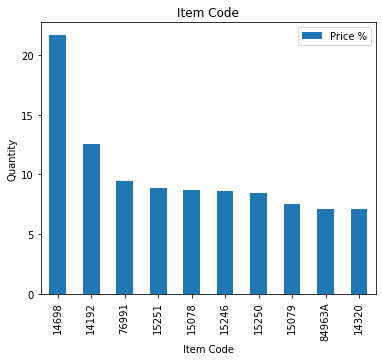

In [17]:
#top 50 products 
dfg = df_pos.groupby(['Item Code'])['Price'].mean()
dfg=pd.DataFrame(dfg)
dfg=dfg.sort_values(by='Price', ascending=False)
dfg=dfg.head(10)
dfg
dfg['Price %']=(dfg['Price']/sum(dfg['Price']))*100
dfg=dfg.drop(['Price'],axis=1)
dfg
dfg.plot(kind='bar', title='Item Code', ylabel='Quantity',xlabel='Item Code', figsize=(6, 5))

In [18]:
dfg

,Price %
Item Code,
14698,21.645790
14192,12.516426
76991,9.419403
15251,8.906650
15078,8.712255
15246,8.608386
15250,8.482376
15079,7.499771
84963A,7.123140


Top product based on Quantities

<AxesSubplot:title={'center':'Item Code'}, xlabel='Item Code', ylabel='Quantity'>

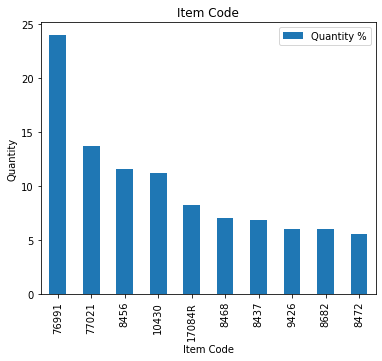

In [19]:
#top 50 products 
dfg = df_pos.groupby(['Item Code'])['Quantity'].mean()
dfg=pd.DataFrame(dfg)
dfg=dfg.sort_values(by='Quantity', ascending=False)
dfg=dfg.head(10)
dfg
dfg['Quantity %']=(dfg['Quantity']/sum(dfg['Quantity']))*100
dfg=dfg.drop(['Quantity'],axis=1)
dfg
dfg.plot(kind='bar', title='Item Code', ylabel='Quantity',xlabel='Item Code', figsize=(6, 5))

convert time to only hours

In [20]:
df_pos['Time']=df_pos['Time'].map(str)
df_pos['hour']=df_pos['Time'].str[0:2]
df_pos.hour.map(str)

0         15
1         14
2         14
3         14
4         14
          ..
537945    12
537946    12
537947    12
537948    12
537949    12
Name: hour, Length: 396006, dtype: object

# As we see we have time from 00 to 24 so grouping them together to see when is the time we can see highest sales 

We have Grouped below to find a item graph base on time frame 

In [21]:
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('01','late night'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('02','late night'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('03','late night'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('04','late night'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('05','Early morning'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('06','Early morning'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('07','Early morning'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('08','Early morning'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('09','Morning'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('10','Morning'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('11','Morning'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('12','Noon'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('13','Noon'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('14','Noon'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('15','Noon'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('16','Noon'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('17','Evening'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('18','Evening'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('19','Evening'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('20','Evening'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('21','Night'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('22','Night'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('23','Night'))
df_pos['hour']=df_pos['hour'].apply(lambda x:x.replace('24','Night'))

In [22]:
df_pos

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,hour
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,Noon
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,Noon
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,Noon
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,Noon
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,Noon
...,...,...,...,...,...,...,...,...,...,...
537945,37.0,14693,402292,2017-11-28,1,12:07:00,384.0,384.0,Location 8,Noon
537946,37.0,14693,402292,2017-11-27,1,12:07:00,398.0,398.0,Location 8,Noon
537947,21.0,77618,363890,2016-12-21,8,12:58:00,308.0,2464.0,Location 8,Noon
537948,21.0,85194L,363890,2016-12-21,36,12:58:00,113.0,4068.0,Location 8,Noon


<AxesSubplot:title={'center':'Item Code'}, xlabel='Hour of Shopping', ylabel='Quantity'>

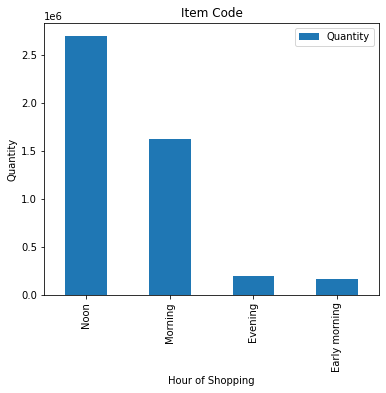

In [23]:
dfg = df_pos.groupby(['hour'])['Quantity'].sum()
dfg=pd.DataFrame(dfg)
dfg=dfg.sort_values(by='Quantity', ascending=False)
dfg
dfg.plot(kind='bar', title='Item Code', ylabel='Quantity',xlabel='Hour of Shopping', figsize=(6, 5))

<AxesSubplot:title={'center':'Item Code'}, xlabel='Hour of Shopping', ylabel='Price'>

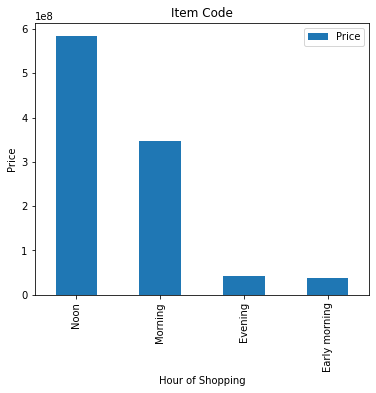

In [24]:
dfg = df_pos.groupby(['hour'])['Price'].sum()
dfg=pd.DataFrame(dfg)
dfg=dfg.sort_values(by='Price', ascending=False)
dfg
dfg.plot(kind='bar', title='Item Code', ylabel='Price',xlabel='Hour of Shopping', figsize=(6, 5))

Result--->we can see the highest sale was during Noon between 12:00 to 16:00 followed by Morning between 9:00 to 11:00

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

RECENCY (R): Days since last purchase
FREQUENCY (F): Total number of purchases
MONETARY VALUE (M): Total money this customer spent.

Dataframe recency_df created by grouping customer ID and date of purchase on the bases on maximum date that last purchase done by the customer i.e. Last purchase made by the Customer

In [25]:
recency_df = df_pos.groupby('CustomerID')['Date of purchase'].max().reset_index().sort_values(['Date of purchase'],ascending=False)
  
# Print the first value in each group
recency_df.head(100)


,CustomerID,Date of purchase
3812,3855.0,2017-12-19
1056,1068.0,2017-12-19
296,302.0,2017-12-19
3742,3784.0,2017-12-19
325,331.0,2017-12-19
...,...,...
2530,2556.0,2017-12-18
2536,2563.0,2017-12-18
3323,3360.0,2017-12-18
3322,3359.0,2017-12-18


Now will store the current date i.e date fed into it

In [26]:
now = pd.Timestamp('2017-12-27 00:00:00')

Adding column Recency in dataframe recency_df to calculate the date from now till the last purchase date of the customer

In [27]:
#calculate recency
recency_df['Recency'] = recency_df['Date of purchase'].apply(lambda x: (now - x).days)
recency_df

,CustomerID,Date of purchase,Recency
3812,3855.0,2017-12-19,8
1056,1068.0,2017-12-19,8
296,302.0,2017-12-19,8
3742,3784.0,2017-12-19,8
325,331.0,2017-12-19,8
...,...,...,...
3219,3255.0,2016-12-10,382
1989,2008.0,2016-12-09,383
2202,2223.0,2016-12-07,385
1638,1654.0,2016-12-05,387


Removing duoplicates against customer id as we have unique combinations of customer id and invoice no

In [28]:
# drop duplicates
df_pos_copy = df_pos
df_pos_copy.drop_duplicates(subset=['InvoieNo', 'CustomerID'], keep="first", inplace=True)
df_pos_copy

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,hour
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,Noon
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,Noon
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,Noon
5,4349.0,14618,397122,2017-10-27,1,12:43:00,256.0,256.0,Location 1,Noon
7,4341.0,85014B,377109,2017-05-14,3,09:22:00,677.0,2031.0,Location 1,Morning
...,...,...,...,...,...,...,...,...,...,...
537143,2494.0,15778,393957,2017-10-02,24,13:03:00,495.0,11880.0,Location 37,Noon
537328,1543.0,15778,394720,2017-10-11,24,12:59:00,460.0,11040.0,Location 37,Noon
537647,3366.0,8468,403190,2017-11-27,100,10:32:00,48.0,4800.0,Location 4,Morning
537652,3244.0,46000U,369050,2017-02-16,3,09:46:00,167.0,501.0,Location 4,Morning


Count the no of invoices aginst the customer ID to count what was the freuqency 

In [29]:
#calculate frequency of purchases
frequency_df = df_pos_copy.groupby(by=['CustomerID'], as_index=False)['InvoieNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.tail(30)

,CustomerID,Frequency
4294,4342.0,4
4295,4343.0,7
4296,4344.0,2
4297,4345.0,2
4298,4346.0,1
4299,4347.0,1
4300,4348.0,1
4301,4349.0,2
4302,4350.0,1
4303,4352.0,8


In [30]:
df_pos.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location', 'hour'],
      dtype='object')

Monetary value against each customer by calcuation total sum of the price

In [31]:
monetary_df = df_pos.groupby(by='CustomerID',as_index=False).agg({'Price': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,2.0,16916.0
1,3.0,37860.0
2,4.0,1830.0
3,5.0,1470.0
4,6.0,15036.0


merge recency dataframe with frequency dataframe

In [32]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Date of purchase,Recency,Frequency
0,3855.0,2017-12-19,8,25
1,1068.0,2017-12-19,8,31
2,302.0,2017-12-19,8,1
3,3784.0,2017-12-19,8,7
4,331.0,2017-12-19,8,206


Merge with monetary dataframe to get a table with the 3 columns

In [33]:

rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
#check the head
rfm_df.head(20)

,Date of purchase,Recency,Frequency,Monetary
CustomerID,,,,
3855.0,2017-12-19,8,25,68230.0
1068.0,2017-12-19,8,31,355541.0
302.0,2017-12-19,8,1,2880.0
3784.0,2017-12-19,8,7,12885.0
331.0,2017-12-19,8,206,185592.0
3163.0,2017-12-19,8,17,40703.0
72.0,2017-12-19,8,7,20838.0
2641.0,2017-12-19,8,8,5769.0
1269.0,2017-12-19,8,23,72634.0


Dropping date of purchase column from dataframe rfm_df

In [34]:
rfm_df=rfm_df.drop(['Date of purchase'],axis=1)

In [35]:
rfm_df

,Recency,Frequency,Monetary
CustomerID,,,
3855.0,8,25,68230.0
1068.0,8,31,355541.0
302.0,8,1,2880.0
3784.0,8,7,12885.0
331.0,8,206,185592.0
...,...,...,...
3255.0,382,1,1594.0
2008.0,383,1,12024.0
2223.0,385,1,1686.0


The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. one is the best/highest value, and four is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

Note: Quintiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 555 possible combinations. So, we will use quartiles.

In [36]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,26.00,1.0,1572.0
0.50,59.00,2.0,3829.5
0.75,150.25,5.0,9946.0


We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good.

In [37]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [38]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [39]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
3855.0,8,25,68230.0,1,1,1
1068.0,8,31,355541.0,1,1,1
302.0,8,1,2880.0,1,4,3
3784.0,8,7,12885.0,1,1,1
331.0,8,206,185592.0,1,1,1


Converting R_Quartile,F_Quartile,M_Quartile intp string as its a concat function 

In [40]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.astype(str) \
                            + rfm_segmentation.F_Quartile.astype(str) \
                            + rfm_segmentation.M_Quartile.astype(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
3855.0,8,25,68230.0,1,1,1,111
1068.0,8,31,355541.0,1,1,1,111
302.0,8,1,2880.0,1,4,3,143
3784.0,8,7,12885.0,1,1,1,111
331.0,8,206,185592.0,1,1,1,111


Best Recency score = 1: most recently purchase. Best Frequency score = 1: most quantity purchase. Best Monetary score = 1: spent the most.

Let's see who are our Champions (best customers).

In [41]:
rfm_segmentation[rfm_segmentation['RFMScore']=="111"].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
4234.0,10,49,1334323.0,1,1,1,111
2709.0,12,43,1200106.0,1,1,1,111
4126.0,16,26,1137087.0,1,1,1,111
3759.0,17,38,1066482.0,1,1,1,111
1704.0,10,69,997364.0,1,1,1,111
2538.0,20,25,853468.0,1,1,1,111
1896.0,9,199,819151.0,1,1,1,111
3203.0,12,27,816771.0,1,1,1,111
2946.0,19,17,750728.0,1,1,1,111


In [42]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==1]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==1]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='311']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='411']))
print('Worst Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))


Best_Customers=len(rfm_segmentation[rfm_segmentation['RFMScore']=='111'])
Loyal_Customers=len(rfm_segmentation[rfm_segmentation['F_Quartile']==1])
Big_Spenders=len(rfm_segmentation[rfm_segmentation['M_Quartile']==1])
Almost_Lost=len(rfm_segmentation[rfm_segmentation['RFMScore']=='311'])
Lost_Customers=len(rfm_segmentation[rfm_segmentation['RFMScore']=='411'])
Worst_Customers=len(rfm_segmentation[rfm_segmentation['RFMScore']=='444'])

Best Customers:  415
Loyal Customers:  863
Big Spenders:  1081
Almost Lost:  63
Lost Customers:  13
Worst Customers:  389


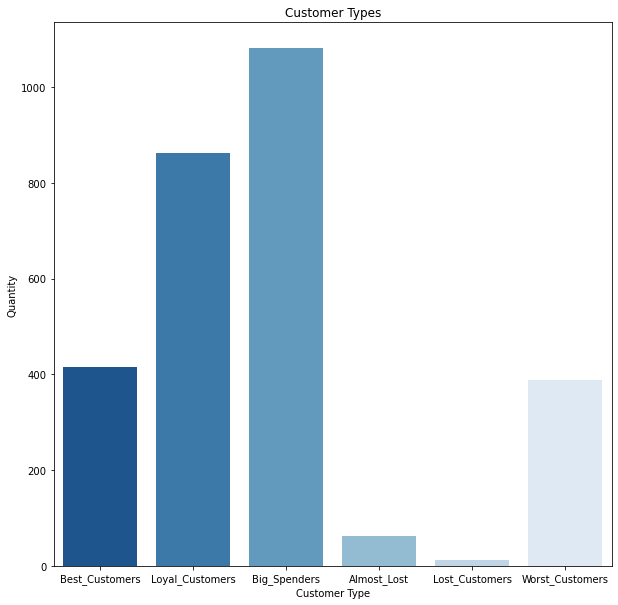

In [43]:
# visualizing the customers
cust = pd.DataFrame([[Best_Customers,Loyal_Customers,Big_Spenders,Almost_Lost,Lost_Customers,Worst_Customers]],columns=['Best_Customers','Loyal_Customers','Big_Spenders','Almost_Lost','Lost_Customers','Worst_Customers'])
cust
fig, ax = plt.subplots(figsize=(10,10))
cust_melt = pd.melt(cust)
sns.barplot(x = cust_melt.variable, y = cust_melt.value, order=['Best_Customers','Loyal_Customers','Big_Spenders','Almost_Lost','Lost_Customers','Worst_Customers'], palette="Blues_r");
plt.title('Customer Types')
plt.ylabel('Quantity')
plt.xlabel('Customer Type');

# After Customer Segmentation Now we will implement K-means to see the No of Clusters and Cluster the Customers as per their commoun similarities

In [44]:
# importing kmeans
from sklearn.cluster import KMeans

# creating a copy of the dataframe
rfm_segmentation
rfm_copy=rfm_segmentation
rfm_copy

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
3855.0,8,25,68230.0,1,1,1,111
1068.0,8,31,355541.0,1,1,1,111
302.0,8,1,2880.0,1,4,3,143
3784.0,8,7,12885.0,1,1,1,111
331.0,8,206,185592.0,1,1,1,111
...,...,...,...,...,...,...,...
3255.0,382,1,1594.0,4,4,3,443
2008.0,383,1,12024.0,4,4,1,441
2223.0,385,1,1686.0,4,4,3,443


In [45]:
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
3855.0,8,25,68230.0,1,1,1,111
1068.0,8,31,355541.0,1,1,1,111
302.0,8,1,2880.0,1,4,3,143
3784.0,8,7,12885.0,1,1,1,111
331.0,8,206,185592.0,1,1,1,111
...,...,...,...,...,...,...,...
3255.0,382,1,1594.0,4,4,3,443
2008.0,383,1,12024.0,4,4,1,441
2223.0,385,1,1686.0,4,4,3,443


In [46]:
rfm_segmentation=rfm_segmentation.drop(['R_Quartile','F_Quartile','M_Quartile','RFMScore'],axis=1)
rfm_segmentation

,Recency,Frequency,Monetary
CustomerID,,,
3855.0,8,25,68230.0
1068.0,8,31,355541.0
302.0,8,1,2880.0
3784.0,8,7,12885.0
331.0,8,206,185592.0
...,...,...,...
3255.0,382,1,1594.0
2008.0,383,1,12024.0
2223.0,385,1,1686.0


Normalizing the data using minmaxdata so our data is between the ranges of 0 to 1

In [71]:
kmeans?

In [47]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
rfm_segmentation = min_max_scaler.fit_transform(rfm_segmentation)
rfm_segmentation = pd.DataFrame(rfm_segmentation)

In [48]:
rfm_segmentation = pd.DataFrame(rfm_segmentation)

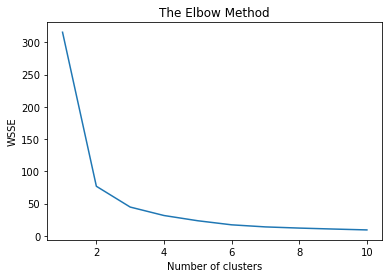

In [49]:
# Using the elbow method to find the optimal number of clusters
#from sklearn.cluster import KMeans

wsse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(rfm_segmentation)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
#plt.scatter(range(1, 11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()


In [50]:
rfm_segmentation

,0,1,2
0,0.000000,0.117073,0.051110
1,0.000000,0.146341,0.266439
2,0.000000,0.000000,0.002133
3,0.000000,0.029268,0.009631
4,0.000000,1.000000,0.139069
...,...,...,...
4319,0.984211,0.000000,0.001169
4320,0.986842,0.000000,0.008986
4321,0.992105,0.000000,0.001238
4322,0.997368,0.000000,0.003266


From Elbow method we found out 3 to be the best No of Clusters

In [51]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3,  random_state = 10)
Y_pred = kmeans.fit_predict(rfm_segmentation)

#kmeans.fit(X)-->training
#Y_pred=kmeans.predict(X)-->predicting

Adding Y_pred as new column Cluster in our dataframe rfm_segmentation

In [52]:
rfm_segmentation['Y_pred'] = Y_pred


In [53]:
#rfm_segmentation['Cluster'].value_counts()
rfm_segmentation

,0,1,2,Y_pred
0,0.000000,0.117073,0.051110,0
1,0.000000,0.146341,0.266439,0
2,0.000000,0.000000,0.002133,0
3,0.000000,0.029268,0.009631,0
4,0.000000,1.000000,0.139069,0
...,...,...,...,...
4319,0.984211,0.000000,0.001169,1
4320,0.986842,0.000000,0.008986,1
4321,0.992105,0.000000,0.001238,1
4322,0.997368,0.000000,0.003266,1


In [54]:
X = rfm_segmentation.iloc[:, [0,1,2]].values

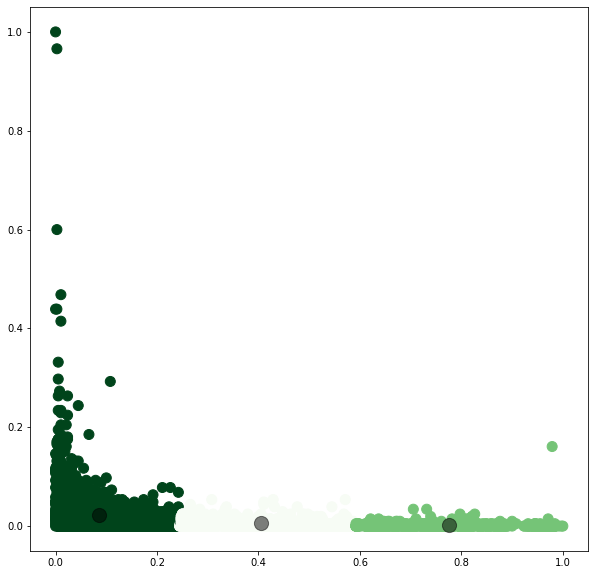

In [55]:
# 2d plot-Recency VS Frequency 
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=Y_pred, s=100, cmap='Greens_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

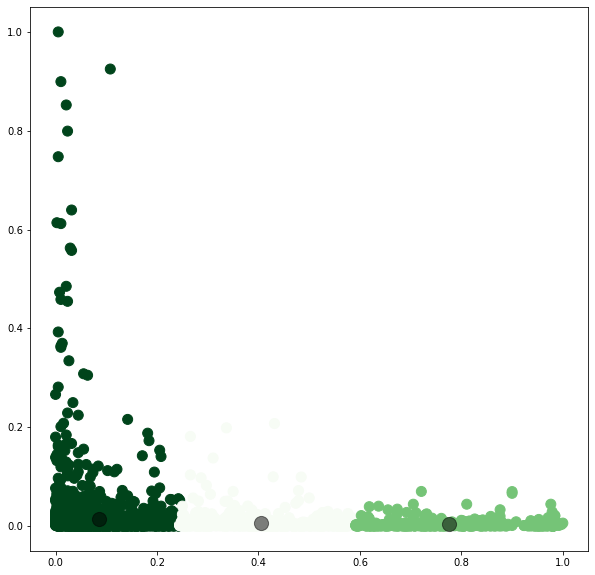

In [56]:
# 2d plot-Recency VS Monetary
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 2], c=Y_pred, s=100, cmap='Greens_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);

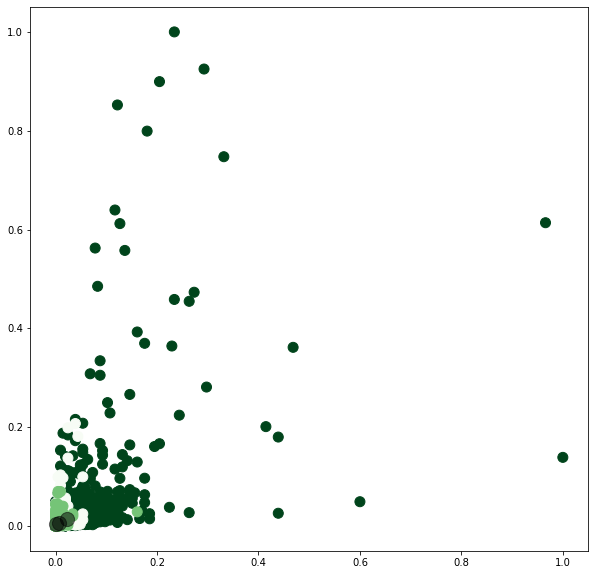

In [57]:
# 2d plot-Frequency VS Monetary
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(X[:, 1], X[:, 2], c=Y_pred, s=100, cmap='Greens_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);

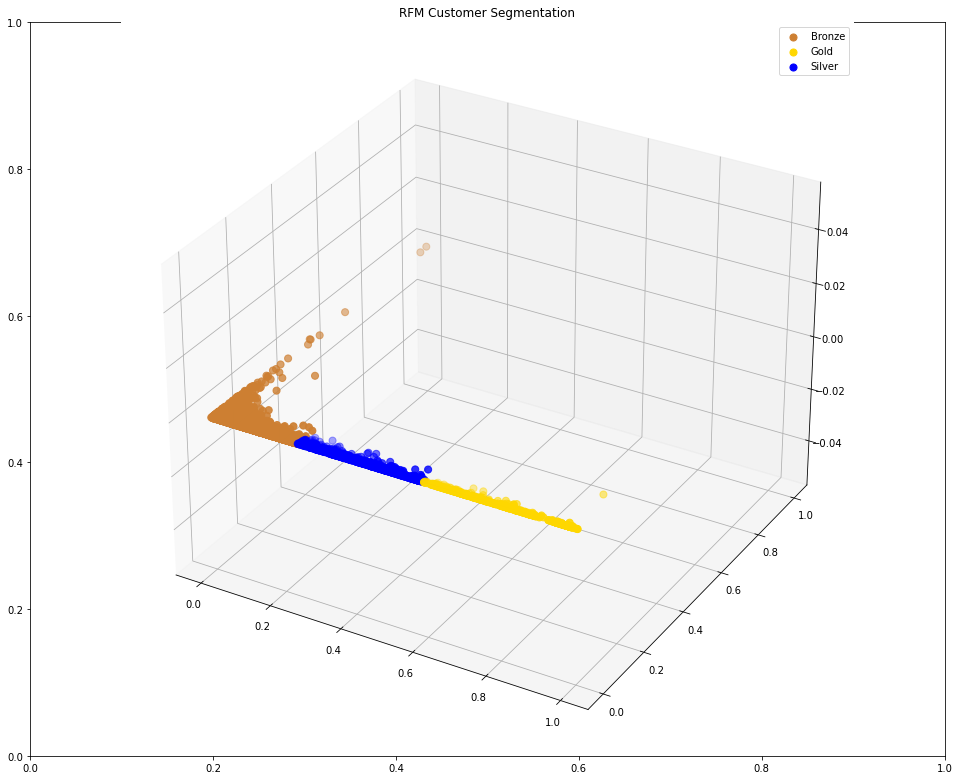

In [58]:
from mpl_toolkits.mplot3d import Axes3D
# 3D visualization
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[Y_pred == 0,0],X[Y_pred == 0,1], s= 50, c= '#cd7f32',label= 'Bronze')
plt.scatter(X[Y_pred == 1,0], X[Y_pred == 1,1], s= 50, c= 'gold', label= 'Gold')
plt.scatter(X[Y_pred == 2,0], X[Y_pred == 2,1], s= 50, c= 'blue', label= 'Silver')
# centroids
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 200, c= 'Blue', label= 'Centroids')
plt.title('RFM Customer Segmentation')
plt.legend()
# plt.savefig('clusters.png')
plt.tight_layout()

In [59]:
df=rfm_segmentation
df.rename(columns={0:"Recency",1:'Frequency',2:'Monetary'},inplace=True)
df

,Recency,Frequency,Monetary,Y_pred
0,0.000000,0.117073,0.051110,0
1,0.000000,0.146341,0.266439,0
2,0.000000,0.000000,0.002133,0
3,0.000000,0.029268,0.009631,0
4,0.000000,1.000000,0.139069,0
...,...,...,...,...
4319,0.984211,0.000000,0.001169,1
4320,0.986842,0.000000,0.008986,1
4321,0.992105,0.000000,0.001238,1
4322,0.997368,0.000000,0.003266,1


In [60]:
rslt_df = df[df['Y_pred']==0]
rslt_df.describe()

,Recency,Frequency,Monetary,Y_pred
count,2897.000000,2897.000000,2897.000000,2897.0
mean,0.085024,0.021561,0.014638,0.0
std,0.066142,0.043702,0.056532,0.0
min,0.000000,0.000000,0.000007,0.0
25%,0.028947,0.004878,0.001517,0.0
50%,0.065789,0.009756,0.003968,0.0
75%,0.134211,0.024390,0.009374,0.0
max,0.244737,1.000000,1.000000,0.0


Rounding data to two decimal points

In [61]:
df.Recency=round(df.Recency,2)
df.Frequency=round(df.Frequency,2)
df.Monetary=round(df.Monetary,2)
df

,Recency,Frequency,Monetary,Y_pred
0,0.00,0.12,0.05,0
1,0.00,0.15,0.27,0
2,0.00,0.00,0.00,0
3,0.00,0.03,0.01,0
4,0.00,1.00,0.14,0
...,...,...,...,...
4319,0.98,0.00,0.00,1
4320,0.99,0.00,0.01,1
4321,0.99,0.00,0.00,1
4322,1.00,0.00,0.00,1


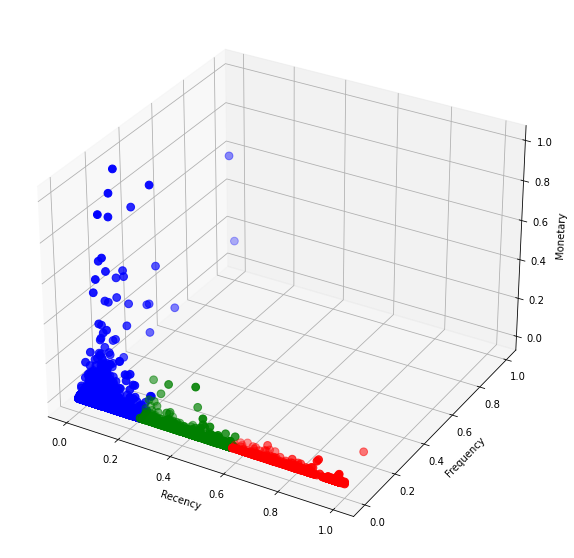

In [62]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Recency[df.Y_pred == 0], df["Frequency"][df.Y_pred == 0], df["Monetary"][df.Y_pred == 0], c='blue', s=60)
ax.scatter(df.Recency[df.Y_pred == 1], df["Frequency"][df.Y_pred == 1], df["Monetary"][df.Y_pred == 1], c='red', s=60)
ax.scatter(df.Recency[df.Y_pred == 2], df["Frequency"][df.Y_pred == 2], df["Monetary"][df.Y_pred == 2], c='green', s=60)
#ax.scatter(df.Recency[df.Cluster == 3], df["Frequency"][df.Cluster == 3], df["Monetary"][df.Cluster == 3], c='orange', s=60)
plt.xlabel("Recency")
plt.ylabel("Frequency")
ax.set_zlabel('Monetary')
#fig=go.figure(data=ax)
plt.show()

In [65]:
rslt_df = df[df['Y_pred']==0]
rslt_df.describe()

,Recency,Frequency,Monetary,Y_pred
count,2897.000000,2897.000000,2897.000000,2897.0
mean,0.085123,0.019838,0.013935,0.0
std,0.066104,0.044117,0.056688,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.030000,0.000000,0.000000,0.0
50%,0.070000,0.010000,0.000000,0.0
75%,0.130000,0.020000,0.010000,0.0
max,0.240000,1.000000,1.000000,0.0


In [66]:
rslt_df = df[df['Y_pred']==1]
rslt_df.describe()

,Recency,Frequency,Monetary,Y_pred
count,624.000000,624.000000,624.000000,624.0
mean,0.775833,0.000913,0.002292,1.0
std,0.118701,0.007097,0.007688,0.0
min,0.590000,0.000000,0.000000,1.0
25%,0.677500,0.000000,0.000000,1.0
50%,0.760000,0.000000,0.000000,1.0
75%,0.870000,0.000000,0.000000,1.0
max,1.000000,0.160000,0.070000,1.0


In [67]:
rslt_df = df[df['Y_pred']==2]
rslt_df.describe()

,Recency,Frequency,Monetary,Y_pred
count,803.000000,803.000000,803.000000,803.0
mean,0.404844,0.004097,0.005118,2.0
std,0.100972,0.007689,0.017149,0.0
min,0.240000,0.000000,0.000000,2.0
25%,0.310000,0.000000,0.000000,2.0
50%,0.410000,0.000000,0.000000,2.0
75%,0.490000,0.010000,0.000000,2.0
max,0.590000,0.050000,0.210000,2.0


In [ ]:
#Conclusion

 As seen from the Above plot we see 
 
 
Cluster 0- This Cluster has recency moderate with low freq and Moderate Monetory are our Almost Lost Customers.


Cluster 1-This Cluster has Low Recency moderatly low Frequency and Low Monetary are our Worst Customers.


Cluster 2-This looks like the best Customer s the recency is quite low High frequency and high Monetory are our Best Customer